In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split

In [32]:
data = pd.read_csv("Titanic_train.csv") 
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [33]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [35]:
data["Embarked"].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [36]:
#Change the categorical data to numerical data
#Start with the Embarked column
data["Embarked"] = data["Embarked"].fillna("S")
data["Embarked"] = data["Embarked"].map({"S":0, "C":1, "Q":2}).astype(int)
data["Embarked"].value_counts()

Embarked
0    646
1    168
2     77
Name: count, dtype: int64

In [37]:
data["Sex"].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [38]:
data["Sex"] = data["Sex"].fillna("male")
data["Sex"] = data["Sex"].map({"male": 0, "female": 1}).astype(int)
data["Sex"].value_counts()

Sex
0    577
1    314
Name: count, dtype: int64

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 83.7+ KB


In [40]:
data.drop(["Name", "Ticket", "Cabin", "PassengerId", "Age"], axis=1, inplace=True)

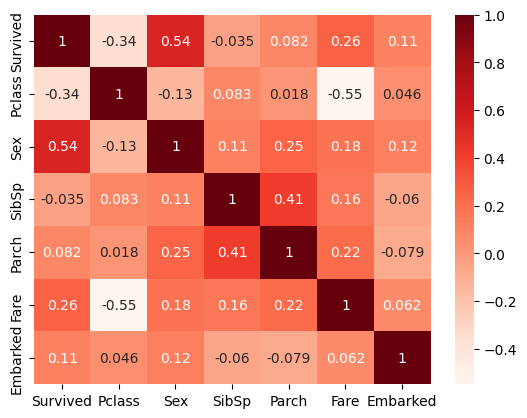

In [41]:
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  891 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 48.9 KB


In [43]:
data.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,0,1,0,7.2500,0
1,1,1,1,1,0,71.2833,1
2,1,3,1,0,0,7.9250,0
3,1,1,1,1,0,53.1000,0
4,0,3,0,0,0,8.0500,0


In [44]:
X = data.drop("Survived", axis=1)
y = data["Survived"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [45]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(712, 6) (712,) (179, 6) (179,)


In [46]:
X_train.head()

,Pclass,Sex,SibSp,Parch,Fare,Embarked
252,1,0,0,0,26.550,0
790,3,0,0,0,7.750,2
466,2,0,0,0,0.000,0
267,3,0,1,0,7.775,0
110,1,0,0,0,52.000,0


In [47]:
X_test.head()

,Pclass,Sex,SibSp,Parch,Fare,Embarked
232,2,0,0,0,13.5000,0
550,1,0,0,2,110.8833,1
410,3,0,0,0,7.8958,0
616,3,0,1,1,14.4000,0
189,3,0,0,0,7.8958,0


Epoch 1/100
178/178 [==============================] - 1s 923us/step - loss: 0.8199 - accuracy: 0.6362
Epoch 2/100
178/178 [==============================] - 0s 939us/step - loss: 0.6083 - accuracy: 0.6826
Epoch 3/100
178/178 [==============================] - 0s 910us/step - loss: 0.5732 - accuracy: 0.7177
Epoch 4/100
178/178 [==============================] - 0s 911us/step - loss: 0.5281 - accuracy: 0.7528
Epoch 5/100
178/178 [==============================] - 0s 953us/step - loss: 0.5226 - accuracy: 0.7612
Epoch 6/100
178/178 [==============================] - 0s 914us/step - loss: 0.5426 - accuracy: 0.7584
Epoch 7/100
178/178 [==============================] - 0s 914us/step - loss: 0.4946 - accuracy: 0.7711
Epoch 8/100
178/178 [==============================] - 0s 911us/step - loss: 0.4983 - accuracy: 0.7921
Epoch 9/100
178/178 [==============================] - 0s 914us/step - loss: 0.5209 - accuracy: 0.7654
Epoch 10/100
178/178 [==============================] - 0s 914us/step - l

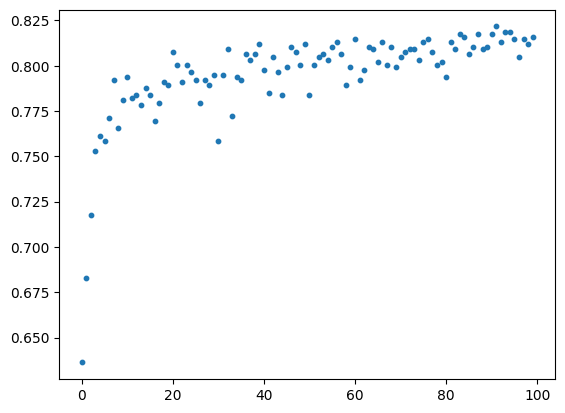

In [69]:
X = data.drop("Survived", axis=1)
y = data["Survived"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = Sequential()
model.add(Dense(64, activation='relu', input_dim=(X_train.shape[1])))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
number_of_epochs = 100

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=number_of_epochs, batch_size=4, verbose=1)

plt.scatter(range(number_of_epochs), model.history.history['accuracy'], s=10)

#print the accuracy on the testing data
print(model.predict(X_test[:5]))
print(y_test[:5])
print("Accuracy on test data is: ", model.evaluate(X_test, y_test)[1]*100, "%")

In [ ]:
from sklearn.ensemble import HistGradientBoostingClassifier 
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

def evaluating_model(y_test, y_pred):  
    ''' 
    Function for evaluating our models.
    '''
    print("Accuracy Score:- ", accuracy_score(y_test, y_pred)) 
    print("Precision Score:- ", precision_score(y_test, y_pred)) 
    print("Recall Score:- ", recall_score(y_test, y_pred)) 
    print("Confusion Matrix:- \n", confusion_matrix(y_test, y_pred))
    #what is precision score?
    #\ 

lr = HistGradientBoostingClassifier() 
lr.fit(X_train, y_train)
predictions = lr.predict(X_test)  
actual = y_test
lr.score(X_test, y_test)
evaluating_model(y_test, predictions)


Accuracy Score:-  0.8603351955307262
Precision Score:-  0.8059701492537313
Recall Score:-  0.8181818181818182
Confusion Matrix:- 
 [[100  13]
 [ 12  54]]


In [ ]:
# Creating a submission file
def make_submission(kaggle_predictions):
    path="submission.csv"
    kaggle_predictions.to_csv(path, index=False)
    print(f"Submission exported to {path}")
    
kaggle_predictions = pd.DataFrame({
    "PassengerId": X_test["PassengerId"],
    "Survived": predictions

})
make_submission(kaggle_predictions)

KeyError: 'PassengerId'